In [1]:
# !git clone https://github.com/superkisa/MLbase_2021_spring cloned-repo
# %cd cloned-repo/lecture02/Homework/Problem1
# !ls

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import time
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import classification_report

Посмотрим информацию о таблице и изменим ее.

In [3]:
df = pd.read_csv('weatherAUS.csv', delimiter=',')
df_name_columns = ['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am','Cloud3pm', 'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow']
df.set_axis(df_name_columns, axis = 'columns', inplace = True)

print('Count NA in columns')
print(df.isna().sum().sort_values(ascending=False)/145460)
print()


new_df = df.drop(columns=['Sunshine', 'Evaporation', 'Cloud3pm', 'Cloud9am']).dropna()
#.fillna(0)
#.dropna()
print(new_df.head(10))
new_df.info()
print()

df_ward_columns = ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
labelencoder = preprocessing.LabelEncoder()
for i in df_ward_columns:
    new_df.loc[:, i] = labelencoder.fit_transform(new_df.loc[:, i])

# new_df.loc[:, 'Date'] = labelencoder.fit_transform(new_df.loc[:, 'Date'])
# new_df.loc[:, 'Location'] = labelencoder.fit_transform(new_df.loc[:, 'Location'])
# new_df.loc[:, 'WindGustDir'] = labelencoder.fit_transform(new_df.loc[:, 'WindGustDir'])
# new_df.loc[:, 'WindDir9am'] = labelencoder.fit_transform(new_df.loc[:, 'WindDir9am'])
# new_df.loc[:, 'WindDir3pm'] = labelencoder.fit_transform(new_df.loc[:, 'WindDir3pm'])
# new_df.loc[:, 'RainToday'] = labelencoder.fit_transform(new_df.loc[:, 'RainToday'])
# new_df.loc[:, 'RainTomorrow'] = labelencoder.fit_transform(new_df.loc[:, 'RainTomorrow'])
print(new_df.head(10))

y = pd.Series(new_df['RainTomorrow'])
x = pd.DataFrame(data = new_df.loc[:'RainToday'], columns = new_df.columns[:-1])

x_train, x_test, y_train, y_test = \
    train_test_split(x, y, test_size=0.25, shuffle=False)

Count NA in columns
Sunshine         0.480098
Evaporation      0.431665
Cloud3pm         0.408071
Cloud9am         0.384216
Pressure9am      0.103568
Pressure3pm      0.103314
WindDir9am       0.072639
WindGustDir      0.070989
WindGustSpeed    0.070555
Humidity3pm      0.030984
WindDir3pm       0.029066
Temp3pm          0.024811
RainTomorrow     0.022460
Rainfall         0.022419
RainToday        0.022419
WindSpeed3pm     0.021050
Humidity9am      0.018246
Temp9am          0.012148
WindSpeed9am     0.012148
MinTemp          0.010209
MaxTemp          0.008669
Location         0.000000
Date             0.000000
dtype: float64

         Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  WindGustSpeed  \
0  2008-12-01   Albury     13.4     22.9       0.6           W           44.0   
1  2008-12-02   Albury      7.4     25.1       0.0         WNW           44.0   
2  2008-12-03   Albury     12.9     25.7       0.0         WSW           46.0   
3  2008-12-04   Albury      9.2     28.0  

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday'],
      dtype='object')


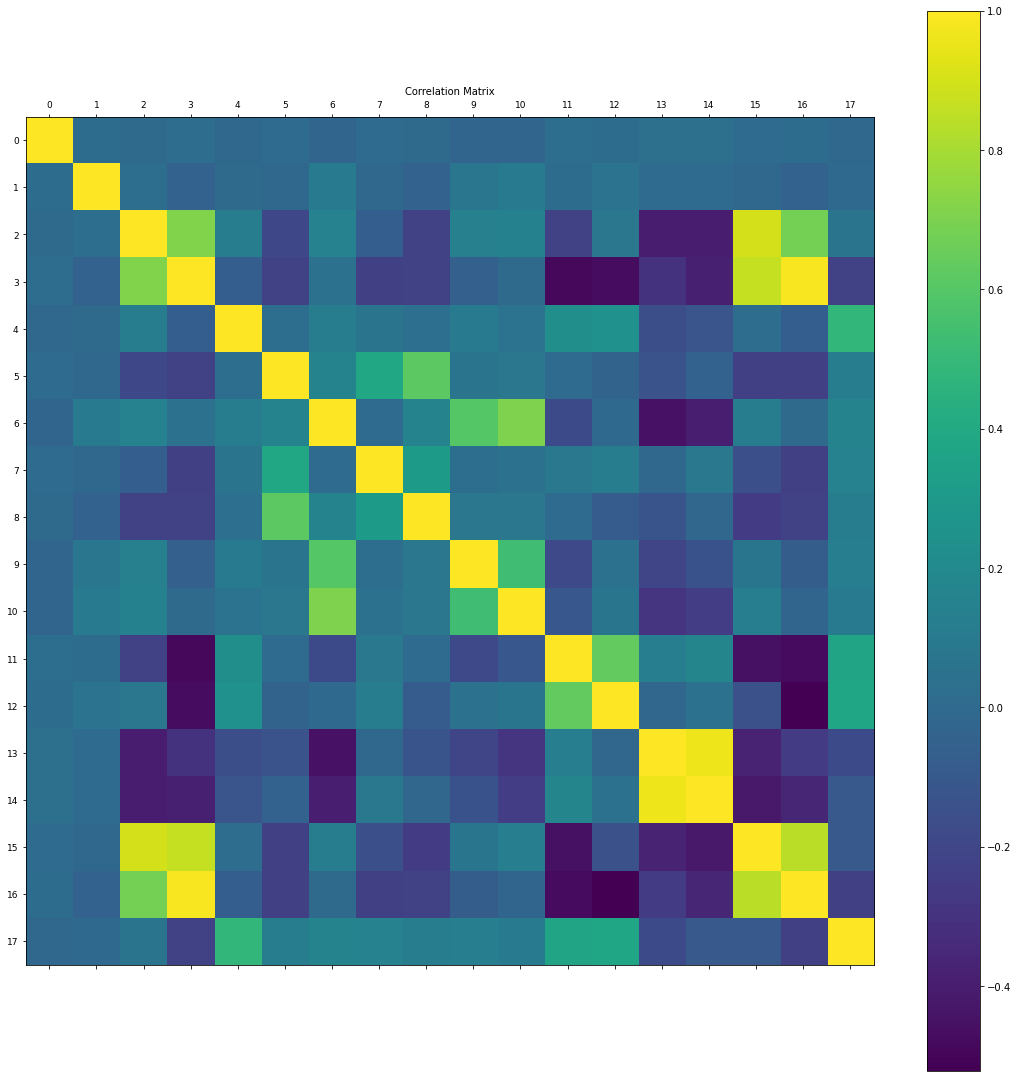

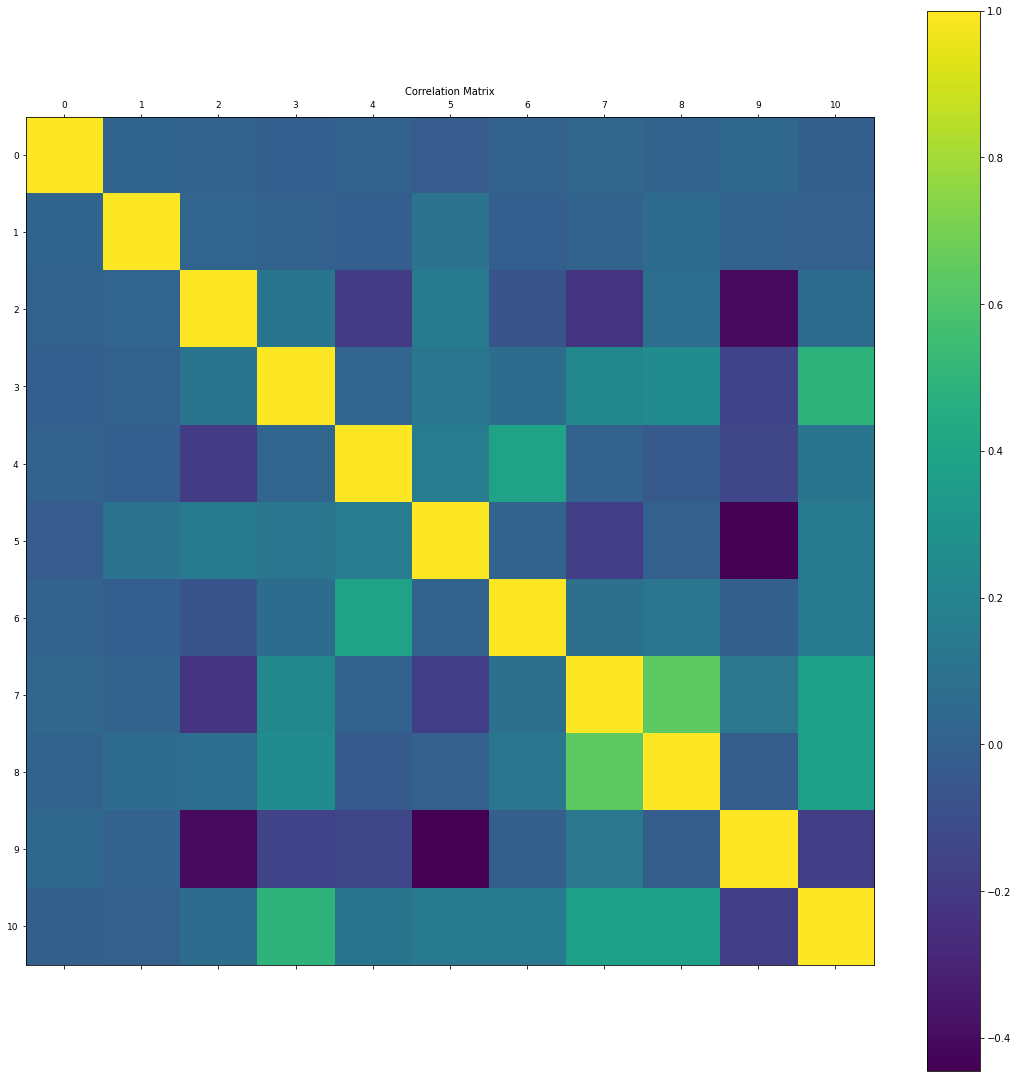

In [4]:
def plot_correlation_matrix(corr_mtrx):
    f = plt.figure(figsize=(19, 19))
    plt.matshow(corr_mtrx, fignum=f.number)
    plt.xticks(range(corr_mtrx.shape[1]), fontsize=9)
    plt.yticks(range(corr_mtrx.shape[1]), fontsize=9)
    cb = plt.colorbar()
    plt.title('Correlation Matrix', fontsize=10)

corr_matrix = np.corrcoef(x_train, rowvar=False)
# print(corr_matrix, corr_matrix.shape)

plot_correlation_matrix(corr_matrix)
print(x_train.columns)
x_train = x_train.drop(columns=['MaxTemp', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure3pm', 'Temp9am', 'Temp3pm'])
x_test = x_test.drop(columns=['MaxTemp', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Pressure3pm', 'Temp9am', 'Temp3pm'])

corr_matrix = np.corrcoef(x_train, rowvar=False)
plot_correlation_matrix(corr_matrix)

x_train['Pressure9am'] = x_train['Pressure9am'] / np.mean(x_train['Pressure9am'])
x_test['Pressure9am'] = x_test['Pressure9am'] / np.mean(x_test['Pressure9am'])

Рассмотрим метод Naive Bayes с распределением по Гауссу.

In [5]:
from sklearn.naive_bayes import  GaussianNB

t1 = time.perf_counter()
classifier = GaussianNB()
classifier.fit(x_train, y_train)
prediction = classifier.predict(x_test)
t2 = time.perf_counter()

GaussNB_acc = np.mean(prediction == y_test)
print('Accuracy of Naive Bayes with Gaussian = ', GaussNB_acc)
GaussNB_time = t2 - t1
print(f'Time of Naive Bayes with Gaussian = {GaussNB_time * 10**6:.2f} msec')

Accuracy of Naive Bayes with Gaussian =  0.8429795976197223
Time of Naive Bayes with Gaussian = 174691.00 msec


Рассмотрим метод KNN.

In [6]:
from sklearn.neighbors import KNeighborsClassifier

KNN_acc = list()
KNN_time = list()
for i in range(1, 31):
    t1 = time.perf_counter()
    neigh = KNeighborsClassifier(n_neighbors=i)
    neigh.fit(x_train, y_train)
    prediction = neigh.predict(x_test)
    t2 = time.perf_counter()
    KNN_acc.append(np.mean(prediction == y_test))
    KNN_time.append(t2 - t1)

print('Accuracy of KNN for k= \bar1,10 = ', KNN_acc)
print('Time of KNN for k= \bar1,10 = ', KNN_time)


Accuracy of KNN for k=ar1,10 =  [0.7880419382261263, 0.8258005100595069, 0.8275715500141683, 0.8373122697648059, 0.8383040521394163, 0.8419169736469255, 0.8450694247662227, 0.844183904788892, 0.8470884103145367, 0.8469113063190705, 0.8488948710682913, 0.8469113063190705, 0.84931992065741, 0.8474780391045622, 0.8496387078492491, 0.8481156134882403, 0.8500637574383678, 0.8479739302918674, 0.8497449702465287, 0.8482927174837064, 0.8501700198356474, 0.8487531878719183, 0.8507721734202324, 0.8488594502691981, 0.8504888070274865, 0.8486115046755455, 0.8507013318220459, 0.84822187588552, 0.8496741286483424, 0.8476197223009351]
Time of KNN for k=ar1,10 =  [6.096662699999996, 7.091352699999987, 7.123980000000003, 6.830887700000005, 7.168293200000008, 7.219909999999999, 7.366074399999988, 7.343455199999994, 7.2869996000000015, 7.754522399999999, 7.722241800000006, 7.764524300000005, 7.838401900000008, 7.928208699999999, 8.07323120000001, 7.6388532, 9.11077739999999, 8.422529199999985, 8.37245369

Построим графики зависимости времени выполнения программы и точности от гиперпараметра k.

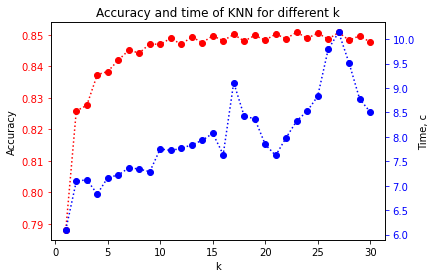

Accuracy of KNN, k=7 =  0.8450694247662227
Time of KNN, k=7, sec =  7.366074399999988


In [7]:
fig, ax = plt.subplots()

axes = [ax, ax.twinx()]
a = np.arange(1, 31)
KNN_acc = pd.Series(data=KNN_acc)
KNN_time = pd.Series(data=KNN_time)
podpisi = pd.Series(data=['Accuracy', 'Time, c'], index=['Red', 'Blue'])
# print(KNN_acc)
# print(KNN_time)
data = pd.DataFrame()
data['Red'] = KNN_acc
data['Blue'] = KNN_time
# print(data)


colors = ['Red', 'Blue']
plt.title('Accuracy and time of KNN for different k')
for ax, color in zip(axes, colors):
    ax.plot(a, data[color], marker='o', linestyle=':', color=color)
    ax.set_ylabel(podpisi[color])
    ax.tick_params(axis='y', colors=color)
axes[0].set_xlabel('k')

plt.show()
print('Accuracy of KNN, k=7 = ', KNN_acc[6])
print('Time of KNN, k=7, sec = ', KNN_time[6])

Начиная с k = 7 точность перестает сильно учеличиваться. Поэтому для сравнения с другими методами будем использовать именно это значение гиперпараметра.

Рассмотрим метод логистической регрессии.

In [8]:
from sklearn.linear_model import LogisticRegression

t1 = time.perf_counter()
classifier = LogisticRegression(penalty =  'l2', max_iter = 5000)
classifier.fit(x_train, y_train)
prediction = classifier.predict(x_test)
t2 = time.perf_counter()
LR_acc = np.mean(prediction == y_test)
LR_time = t2 - t1
print('Accuracy of Logistic regrassion = ', LR_acc)
print('Time of Logistic regrassion, sec = ', LR_time)

Accuracy of Logistic regrassion =  0.8617880419382261
Time of Logistic regrassion, sec =  9.792392899999982


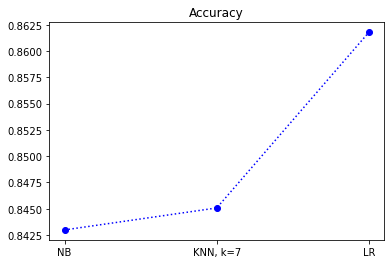

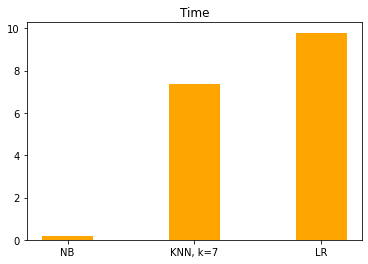

In [9]:
methods = ['NB', 'KNN, k=7', 'LR']
a = np.arange(1, 4)
category1_values = [GaussNB_acc, KNN_acc[6], LR_acc]
category2_values = [GaussNB_time, KNN_time[6], LR_time]

plt.figure()
plt.plot(a,
        category1_values,
        color='blue', marker='o', linestyle=':')
plt.xticks(a, methods)
plt.title('Accuracy')
plt.show()

plt.bar(a,
        category2_values,
        color='orange',
        width=0.4,
        align='center')

plt.xticks(a, methods)
plt.title('Time')
plt.show()

Для вычисления точности была использована метрика Accuracy, показывающаяя отношение попападия модели к общему количеству предсказаний.
Таким образом, для данной таблицы нам выгоднее всего воспользоваться методом Naive Bayes, так как он работает на порядок быстрее KNN и Logistic Regression и при этом мы не сильно проигрываем в точности.